# Simulation of model

In [1]:
import numpy as np
import pandas as pd
from sympy import symbols, solve
from scipy.optimize import fmin
import math
import matplotlib.pyplot as plt
import seaborn as sns

draw n random values for sigma

In [2]:
# number of random sigmas
np.random.seed(123)
n = 1000
m, s = 0 , 1
sigma = np.random.lognormal(mean=m, sigma=s, size=n)
# make to list
sigma = sigma.tolist()

define values for $\pi$ and $\phi$

In [3]:
pi = 1
phi = 0.5

## Cost functions
fixing cost function C()

In [4]:
def C(x, sigma):
    return sigma/x

Cost function K() with $\sigma$, $\pi$ and $\phi$ as parameters

In [5]:
def K(x,sigma, pi=1, phi=0):
    exp = (pi + phi) * x + C(x, sigma)
    return math.exp(exp)

find the minimum x of K() for all sigmas for i) $\phi = 0$ and 2) $\phi = \phi$

In [6]:
xstar = {}
for s in sigma:
    x = fmin(K,0.1, args=(s,pi, 0), disp=False)
    xstar[s] = x[0]

# now add parameter phi
xstar_phi = {}
for s in sigma:
    x = fmin(K,0.1, args=(s,pi, phi), disp=False)
    xstar_phi[s] = x[0]

now put all all in a dataframe and calculate the costs for the optimal x's

In [7]:
df = pd.DataFrame.from_dict(xstar, orient='index', columns=['xstar'])
df = df.reset_index()
df = df.rename(columns={'index':'sigma'})

df_phi = pd.DataFrame.from_dict(xstar_phi, orient='index', columns=['xstar_phi'])
df_phi = df_phi.reset_index()
df_phi = df_phi.rename(columns={'index':'sigma'})

# merge to one
df = df.merge(df_phi)

# calculate fixing cost C
df['fixing_cost'] = df.apply(lambda row: C(row.sigma,row.xstar), axis=1)
# calculate cost K
df['K'] = df.apply(lambda row: K(row.xstar, row.sigma), axis=1)

# calculate fixing cost C
df['fixing_cost_phi'] = df.apply(lambda row: C(row.sigma,row.xstar_phi), axis=1)
# calculate cost K
df['K_phi'] = df.apply(lambda row: K(row.xstar_phi, row.sigma), axis=1)

df.head()

,sigma,xstar,xstar_phi,fixing_cost,K,fixing_cost_phi,K_phi
0,0.337689,0.581094,0.474453,1.720797,3.197022,1.405001,3.274602
1,2.711076,1.646563,1.344375,0.607347,26.925366,0.495883,28.817466
2,1.327077,1.151953,0.940625,0.868038,10.013921,0.708795,10.501001
3,0.221730,0.470859,0.384453,2.123571,2.564502,1.733879,2.614818
4,0.560683,0.748750,0.611406,1.335426,4.470834,1.090468,4.610997


## Plots
plot the optimal $x(\sigma)$ and the functions $C(x,\sigma)$ and $K(x,\sigma)$

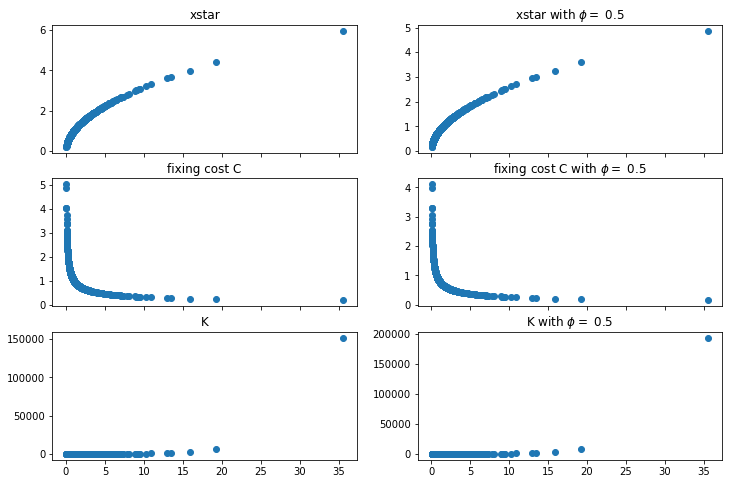

In [8]:
fig, axs = plt.subplots(3,2,figsize=(12,8), sharex=True)
axs[0,0].plot(df.sigma, df.xstar, 'o')
axs[0,0].set_title('xstar')
axs[1,0].plot(df.sigma, df.fixing_cost, 'o')
axs[1,0].set_title('fixing cost C')
axs[2,0].plot(df.sigma, df.K, 'o')
axs[2,0].set_title('K')
# phi
axs[0,1].plot(df.sigma, df.xstar_phi, 'o')
axs[0,1].set_title(f'xstar with $\phi =$ {phi}')
axs[1,1].plot(df.sigma, df.fixing_cost_phi, 'o')
axs[1,1].set_title(f'fixing cost C with $\phi =$ {phi}')
axs[2,1].plot(df.sigma, df.K_phi, 'o')
axs[2,1].set_title(f'K with $\phi =$ {phi}')
plt.show()

density of duration x

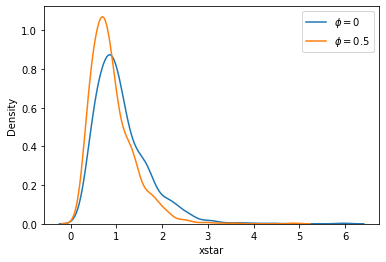

In [9]:
fig, ax = plt.subplots()
sns.kdeplot(df.xstar, label = '$\phi = 0$', ax=ax) 
sns.kdeplot(df.xstar_phi, label = f'$\phi = ${phi}', ax=ax)
plt.xlabel('xstar')
plt.legend()

## Fine Schedule

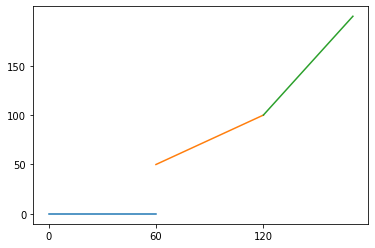

In [10]:
x0, y0 = [0,60], [0,0]
x1, y1 = [60, 120], [50,100]
x2, y2 = [120,170], [100,200]
plt.plot(x0, y0)
plt.plot(x1,y1,x2, y2)
plt.xticks([0,60,120])
plt.yticks([0,50,100,150])
plt.show()

### Fine schedule tradeoff
$\pi*60 + C(60,\sigma) \geq 2(\sigma(\pi + \phi))^{1/2}$

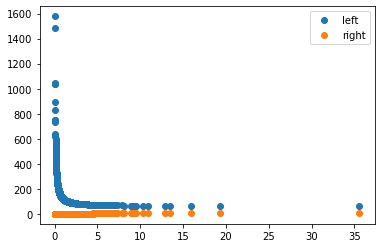

In [11]:
left = [60*pi + C(s,60) for s in sigma]
right = [np.sqrt(2*(s*(pi+phi))) for s in sigma]

plt.plot(sigma, left, 'o', label = 'left')
plt.plot(sigma, right, 'o', label = 'right')
plt.legend()

solve for $\sigma$ where equality holds

In [12]:
x = symbols('s')
exp = 60*pi + C(s,60) - np.sqrt(2*(s*(pi+phi)))
sigma_bar = solve(exp)
if len(sigma_bar) > 0:
    print(f'optimal $\sigma$ is {sigma_bar[0]:.2f}')